# Análise Exploratória de Dados Para a Área de Varejo

## Importando Bibliotecas

In [15]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 

## Carregando os Dados

In [2]:
df = pd.read_csv('dataset.csv')

In [9]:
df.shape

(9700, 11)

In [10]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [11]:
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


# Análise Exploratória 

In [12]:
# Verificando as colunas do dataset

df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [13]:
# Verificando o tipo de dado de cada coluna

df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [14]:
# Resumo estatístico da coluna valor_venda

df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
# Verificando à ocorrência de registros duplicados

df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [12]:
# Verificando de há valores ausentes

df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

# Perguntas de Negócio 

### 1_ Qual Cidade com Maior Valor de Venda de Produtos da Categoria Office Supplies

In [77]:
# Filtrando o DataFrame pela categoria Office Supplies

df1  = df[df['Categoria'] == 'Office Supplies']

# Agrupando por Cidades e Calculando o total de Vendas 

df1_total = df.groupby('Cidade')['Valor_Venda'].sum()

# Econtrando a Cidade Com Maior Valor de Venda

cidade_maior_venda = df1_total.idxmax()

print('A Cidade com Maior Valor de Venda para a Categoria Office Supplies é:', cidade_maior_venda)

A Cidade com Maior Valor de Venda para a Categoria Office Supplies é: New York City


### 2_ Qual o Total de Vendas Por Data do Pedido? 

In [27]:
# Calculando o total de vendas para a data do pedido

df2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [28]:
df2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

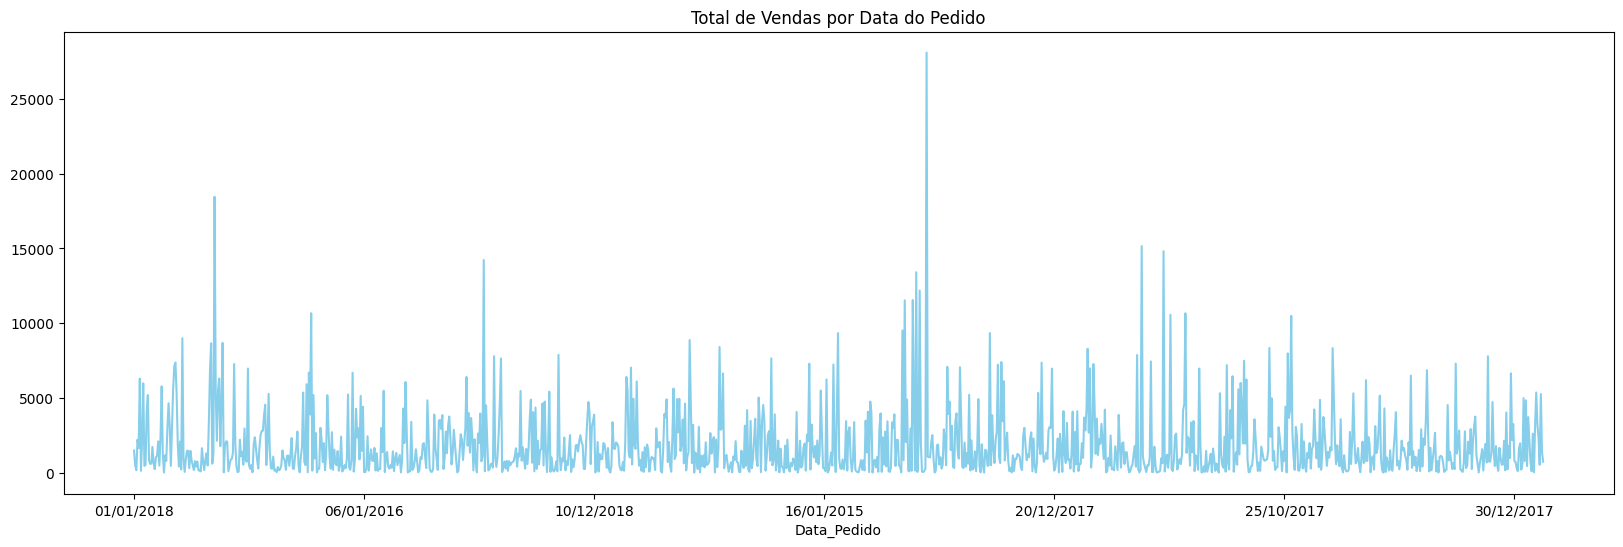

In [29]:
# Criando um Gráfico de Barras 

plt.figure (figsize = (20,6))
df2.plot (x = 'Data_Pedido', y = 'Valor_Venda', color = 'skyblue')
plt.title ('Total de Vendas por Data do Pedido')
plt.show ()

OBS: Como a coluna data pedido, neste caso, trata-se de uma variável categórica e não está sendo tratada como uma série temporal a pergunta foi respondida com sucesso. No entanto, se a pergunta levasse em consideração o decorrer do tempo seria necessário transformar a coluna em uma série temporal

### 3_ Qual o Total de Vendas por Estado? 

In [32]:
# Calculando o Valor de Venda para cada Estado

df3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

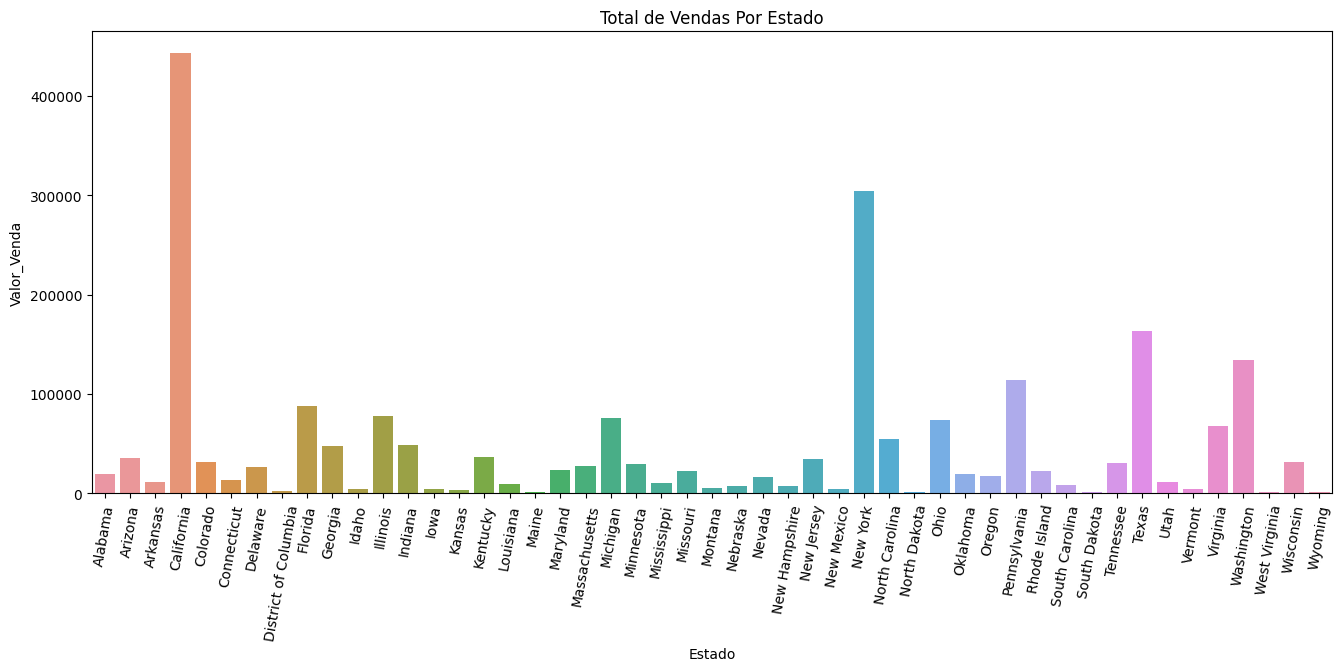

In [33]:
# Demonstrando Graficamante 

plt.figure (figsize = (16, 6))
sns.barplot(x = 'Estado', y = 'Valor_Venda', data = df3)
plt.title ('Total de Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

### 4_ Quais São as 10 Cidades com Maior Total de Vendas? 

In [34]:
#  Agrupando o DataFrame por cidades, calculando o valor de venda e ordenando os dez maiores 

df4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

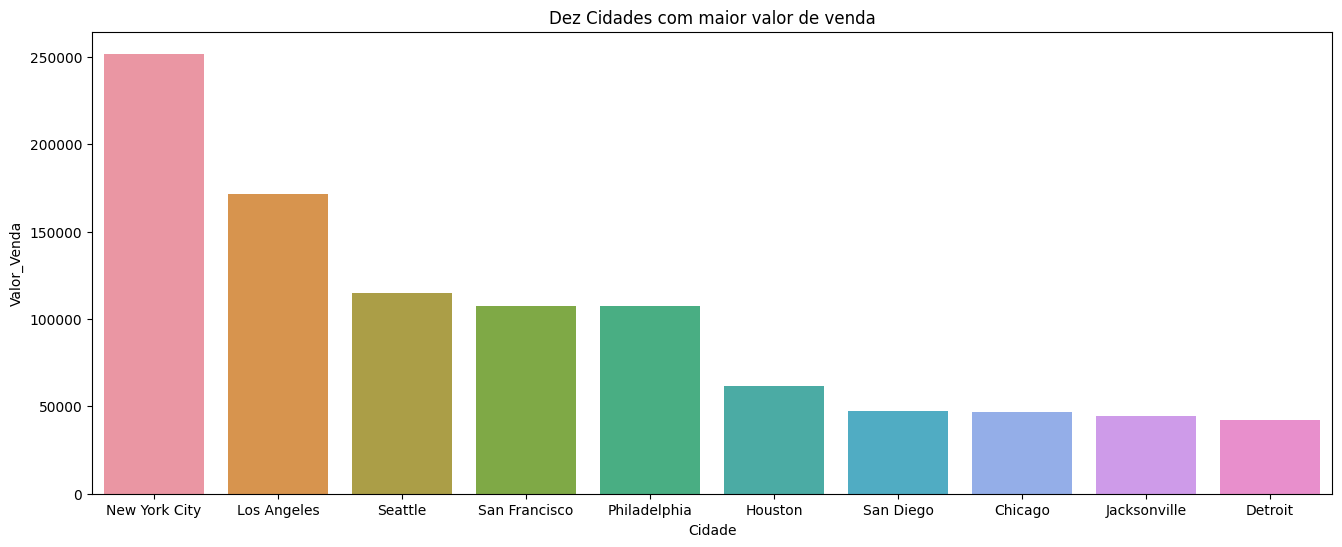

In [39]:
# Demonstrando Graficamente

plt.figure (figsize = (16, 6))
sns.barplot(x = 'Cidade', y = 'Valor_Venda', data = df4)
sns.set_palette('coolwarm')
plt.title ('Dez Cidades com maior valor de venda')
plt.show()

### 5_ Qual Segmento Teve o Maior Total de Vendas?

In [123]:
# Agrupando por Segmento e calculando o Valor de Venda

df5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)

df5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [41]:
# Convertendo os Dados em Valor Absoluto 

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total/100))
        return  '$ {v:d}' .format(v = val)
    return my_format 

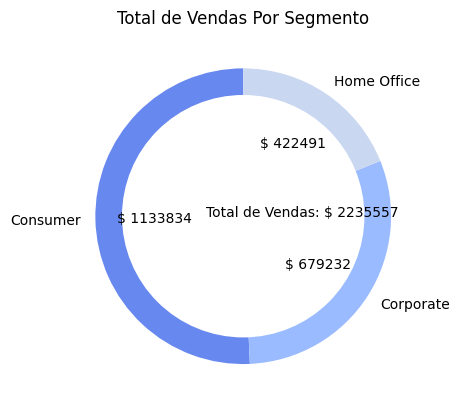

In [42]:
# Demonstrando o Resultado Graficamente 

plt.pie(df5['Valor_Venda'],
        labels = df5['Segmento'],
        autopct = autopct_format(df5['Valor_Venda']),
        startangle = 90)
    
# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
  
# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

### 6_ Qual o Total de Vendas Por Segmento e Por Ano?

In [43]:
# Convertendo a Coluna data pedido para o tipo datetime 

df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'],dayfirst = True) 

In [45]:
df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [46]:
# Extraindo o Ano da coluna data pedido e criando a coluna ano 

df['Ano'] = df['Data_Pedido'].dt.year

In [49]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [50]:
df6 = df.groupby(['Ano','Segmento'])['Valor_Venda'].sum()

In [52]:
df6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

### 7_ Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [53]:
# Criando a Coluna desconto com base nos requisitos solicitados

df['Desconto'] = np.where(df['Valor_Venda'] > 1000,  0.15, 0.10)

In [55]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [58]:
# Total para cada valor de desconto 

df['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [59]:
print('O total de vendas que receberia 15% de desconto é 457')

O total de vendas que receberia 15% de desconto é 457


### 8_ Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto 

In [60]:
# Calculando o valor do desconto e criando uma nova coluna 

df['Valor_Venda_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto']) 

In [61]:
# Filtrando as Vendas antes do desconto 

valor_venda_antes_desconto = df.loc[df['Desconto'] == 0.15 , 'Valor_Venda']

In [62]:
# Filtrando as vendas depois do desconto 

valor_venda_depois_desconto = df.loc[df['Desconto'] == 0.15 , 'Valor_Venda_Desconto']

In [63]:
#  Média de Vendas Antes do Desconto 

media_vendas_antes_desconto = valor_venda_antes_desconto.mean()

In [64]:
# Média de Vendas Depois do Desconto 

media_vendas_depois_desconto = valor_venda_depois_desconto.mean()

In [70]:
print('A média de vendas Antes do desconto de 15% é:',round(media_vendas_antes_desconto,2))

A média de vendas Antes do desconto de 15% é: 2116.81


In [71]:
print('A média de vendas Depois do desconto de 15% é:',round(media_vendas_depois_desconto,2))

A média de vendas Depois do desconto de 15% é: 1799.29


### 9_ Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

In [98]:
# Criando uma coluna chamada mes 

df['Mes'] = df['Data_Pedido'].dt.month

In [106]:
# Agrupando por ano, mes, segmento e calculando as funções de agregação

df9 = df.groupby(['Ano','Mes','Segmento',])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [107]:
df9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [114]:
# Extraindo os níveis 

anos = df9.index.get_level_values(0)
meses = df9.index.get_level_values (1)
segmentos = df9.index.get_level_values (2)

<Figure size 1200x600 with 0 Axes>

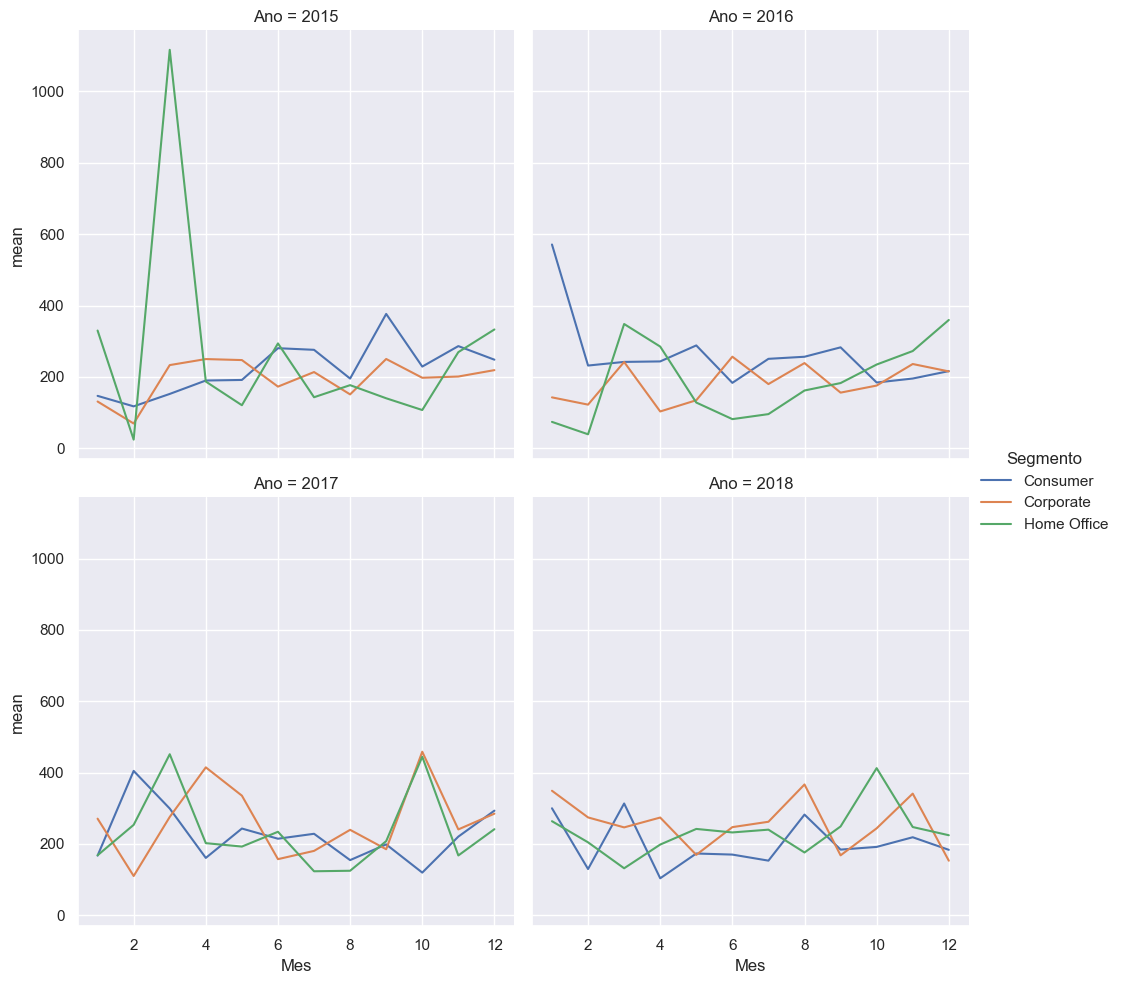

In [117]:
plt.figure (figsize = (12,6))
sns.set()
sns.relplot(kind = 'line', x = meses, y = 'mean', hue = segmentos, col = anos, col_wrap  = 2, data = df9)
plt.show()

### 10_ Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

In [148]:
# Agrupando por Categoria e Subcategoria, e calculando a soma para valores númericos 

df10 = df.groupby(['Categoria','SubCategoria']).sum(numeric_only = True)\
.sort_values('Valor_Venda',ascending = False).head(12)

In [149]:
# Convertendo a coluna valor venda para números inteiros e ordenando por categoria 

df10 = df10[['Valor_Venda']].astype(int).sort_values('Categoria').reset_index()

In [150]:
df10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [152]:
# Agrupando somente por Categoria 

df10_cat = df10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [153]:
df10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [175]:
# Listas de Cores para as Categorias 

cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [176]:
# Listas de Cores para as Subcategorias

cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

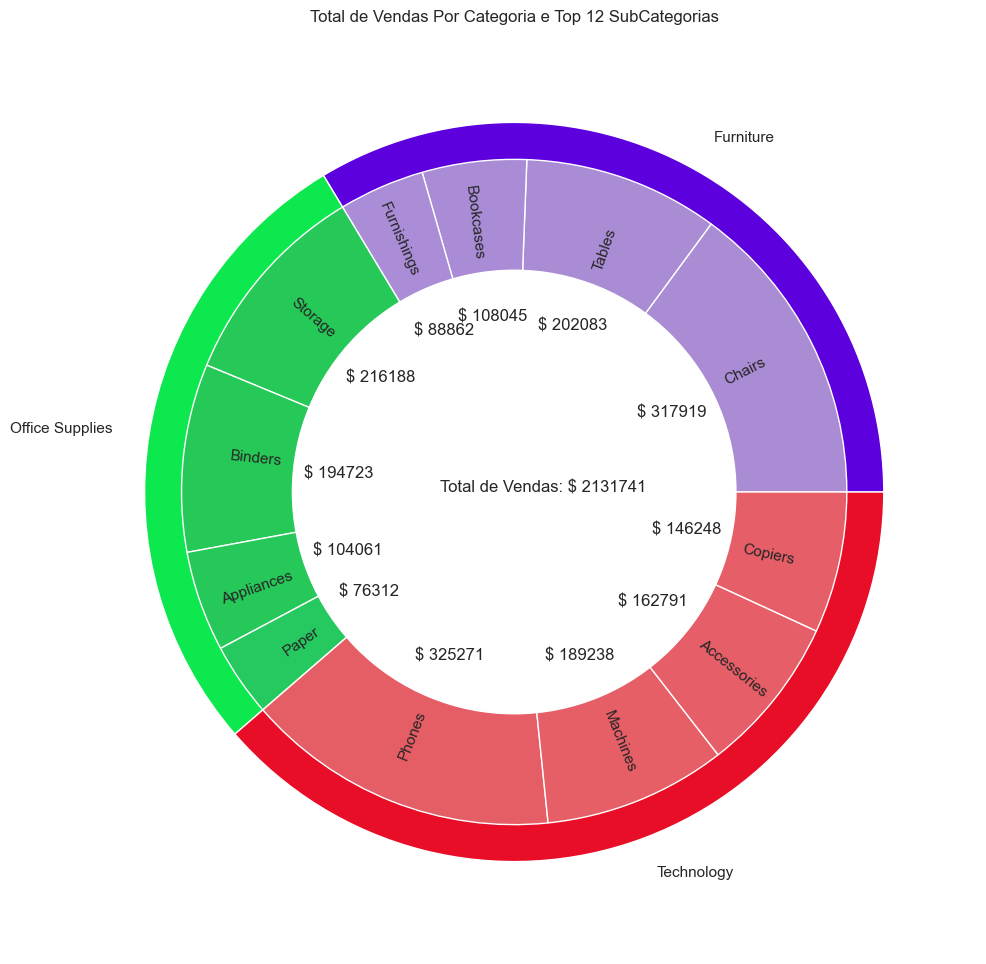

In [181]:
# Apresentando Graficamente 

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias

p1 = ax.pie(df10_cat['Valor_Venda'],
               radius = 1,
               labels = df10_cat['Categoria'],
               wedgeprops = dict(edgecolor = 'white'),
               colors = cores_categorias)
    
# Gráfico das subcategorias

p2 = ax.pie(df10['Valor_Venda'],
               radius = 0.9,
               labels = df10['SubCategoria'],
               autopct = autopct_format(df10['Valor_Venda']),
               colors = cores_subcategorias, 
               labeldistance = 0.7,
               wedgeprops = dict(edgecolor = 'white'), 
               pctdistance = 0.53,
               rotatelabels = True)
    
# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()